In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from time import time
from datetime import timedelta

In [2]:
X = pd.read_csv('USDA-0.2.csv')
y = X['pct_obese_adults13']

drop_cols = ['fips','pct_diabetes_adults13','pct_diabetes_adults08','pct_obese_adults13']
X.drop(drop_cols, axis=1, inplace=True)

In [3]:
cv = KFold(n_splits=5, shuffle=True, random_state=101)

In [4]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100, criterion='mae')

In [6]:
start = time()
oof_preds = cross_val_predict(rf, X, y, cv=cv, method='predict')
end = time()
diff = end - start
td = timedelta(seconds=diff)
print('Completed in {}'.format(td))
mae = mean_absolute_error(y, oof_preds)
print('MAE {:.4f}'.format(mae))
frf = RandomForestRegressor(n_jobs=-1, n_estimators=100, criterion='mae')
start = time()
frf.fit(X,y)
end = time()
diff = end - start
td = timedelta(seconds=diff)
print('Completed in {}'.format(td))

Completed in 0:04:13.539636
MAE 1.9802
Completed in 0:01:19.871660


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

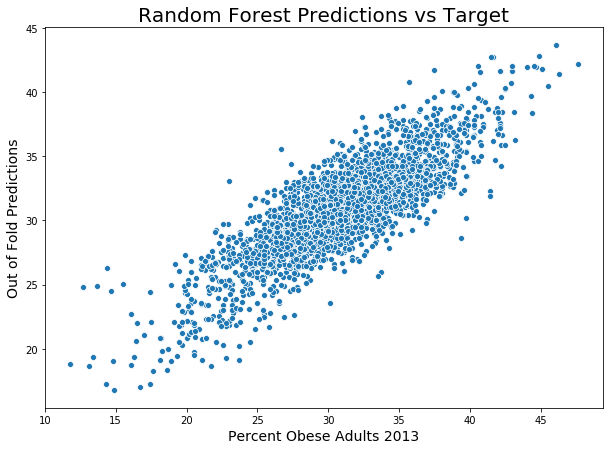

In [8]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot(y, oof_preds, ax=ax)
ax.set_xlabel('Percent Obese Adults 2013', size=14)
ax.set_ylabel('Out of Fold Predictions', size=14)
ax.set_title('Random Forest Predictions vs Target',size=20)
plt.savefig('rf pred vs target',dpe=300)
plt.show()

In [9]:
errors = abs(y - oof_preds)

In [10]:
errors.name = 'Absolute Error'

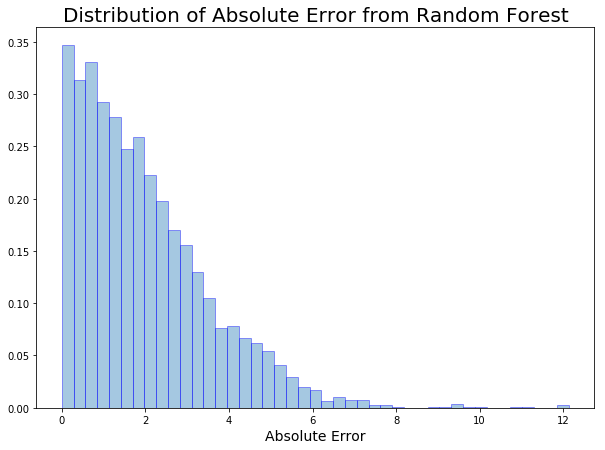

In [11]:
fig, ax = plt.subplots(figsize=(10,7))

sns.distplot(errors, norm_hist=True, kde=False,hist_kws=dict(edgecolor='b'), ax=ax)
ax.set_title('Distribution of Absolute Error from Random Forest',size=20)
ax.set_xlabel('Absolute Error', size=14)
plt.savefig('dist_abs_error', dpi=300)
plt.show()

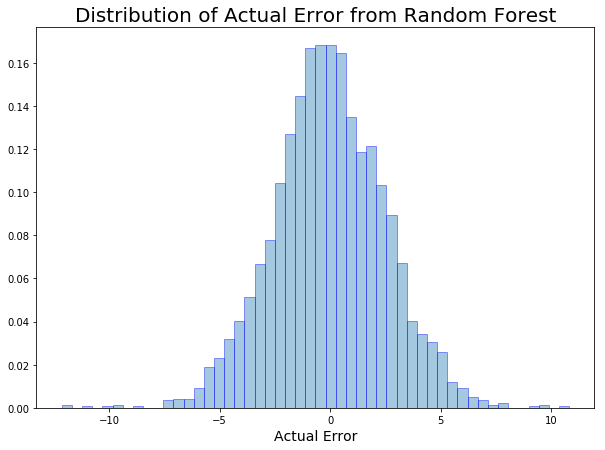

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
actual_error = y - oof_preds
sns.distplot(actual_error, norm_hist=True, kde=False,hist_kws=dict(edgecolor='b'), ax=ax)
ax.set_title('Distribution of Actual Error from Random Forest',size=20)
ax.set_xlabel('Actual Error', size=14)
plt.savefig('dist_actual_error', dpi=300)
plt.show()

In [13]:
feat_imp = pd.DataFrame([(i,j) for i,j in zip(X.columns,frf.feature_importances_)],columns=['Feature','Importance'])
feat_imp.sort_values(by='Importance',ascending=False).head(10)

,Feature,Importance
99,pc_fsrsales12,0.147676
130,pct_sfsp15,0.041514
133,pct_wic15,0.027153
122,pct_free_lunch09,0.026444
94,fsrpth14,0.016932
93,fsrpth09,0.016220
196,pct_nhblack10,0.016002
107,pc_snapben15,0.015410
21,pct_laccess_hhnv15,0.014840
195,pct_nhwhite10,0.014084


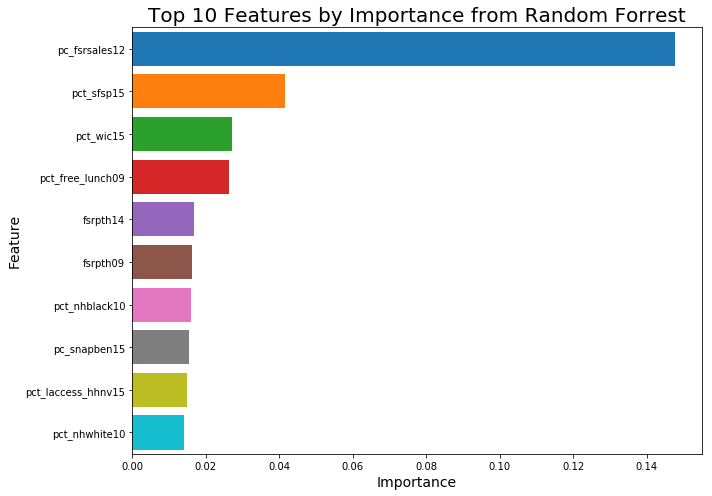

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='Importance', y='Feature', 
            data=feat_imp.sort_values(by='Importance', ascending=False).head(10),
           ax=ax, saturation=1.0)
ax.set_title('Top 10 Features by Importance from Random Forrest', size=20)
ax.set_ylabel('Feature', size=14)
ax.set_xlabel('Importance', size=14)
plt.tight_layout()
plt.savefig('Top 10 Features by Importance from Random Forrest', dpi=300)
plt.show()

In [20]:
variable_data = pd.read_excel('DataDownload.xls',sheet_name='Variable List')
top_feats = [i.upper() for i in feat_imp.sort_values(by='Importance', ascending=False)['Feature'].tolist()][0:10]

In [21]:
variable_data[variable_data['Variable Code'].isin(top_feats)]

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
14,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Households, no car & low access to store (%), ...",PCT_LACCESS_HHNV15,CNTY10,Percent
86,Restaurant Availability and Expenditures,RESTAURANTS,Full-service,"Full-service restaurants/1,000 pop, 2009",FSRPTH09,CNTY10,Count
87,Restaurant Availability and Expenditures,RESTAURANTS,Full-service,"Full-service restaurants/1,000 pop, 2014",FSRPTH14,CNTY10,Count
92,Restaurant Availability and Expenditures,RESTAURANTS,Expenditures,"Expenditures per capita, restaurants, 2012*",PC_FSRSALES12,CNTY10,Dollars
100,Food Assistance,ASSISTANCE,SNAP,"SNAP benefits per capita, 2015",PC_SNAPBEN15,CNTY10,Dollars/capita
115,Food Assistance,ASSISTANCE,National School Lunch Program,"Students eligible for free lunch (%), 2009",PCT_FREE_LUNCH09,CNTY10,Percent
123,Food Assistance,ASSISTANCE,Summer Food Service Program,Summer Food Service Program participants (% po...,PCT_SFSP15,CNTY10,Percent
132,Food Assistance,ASSISTANCE,WIC,"WIC participants (% pop), 2015*",PCT_WIC15,CNTY10,Percent
262,Socioeconomic Characteristics,SOCIOECONOMIC,Race & Age,"% White, 2010",PCT_NHWHITE10,CNTY10,Percent
263,Socioeconomic Characteristics,SOCIOECONOMIC,Race & Age,"% Black, 2010",PCT_NHBLACK10,CNTY10,Percent


In [32]:
top_feats_lower = [i.lower() for i in top_feats]
top_feats_lower

['pc_fsrsales12',
 'pct_sfsp15',
 'pct_wic15',
 'pct_free_lunch09',
 'fsrpth14',
 'fsrpth09',
 'pct_nhblack10',
 'pc_snapben15',
 'pct_laccess_hhnv15',
 'pct_nhwhite10']

In [24]:
top_data = X[top_feats_lower].join(y)

In [35]:
def scatter(x, y, data, save=None):
    fig, ax = plt.subplots(figsize=(10,7))
    title = '{} vs {}'.format(y,x)
    sns.scatterplot(x, y, data=data, ax=ax)
    ax.set_xlabel(x, size=14)
    ax.set_ylabel(y, size=14)
    ax.set_title(title,size=20)
    if save:
        plt.savefig(title.format(),dpe=300)
    plt.show()

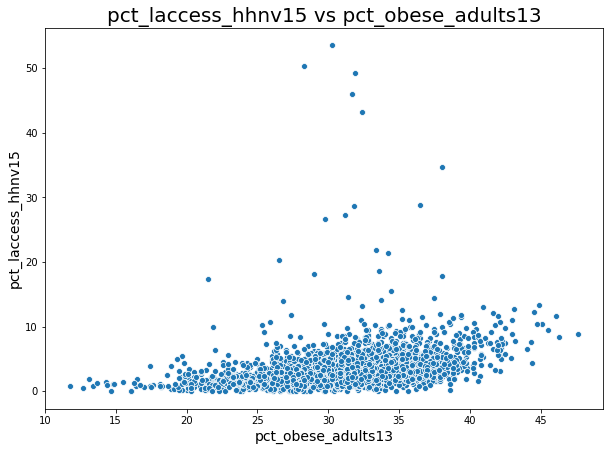

In [44]:
scatter(y.name, 'pct_laccess_hhnv15', top_data)

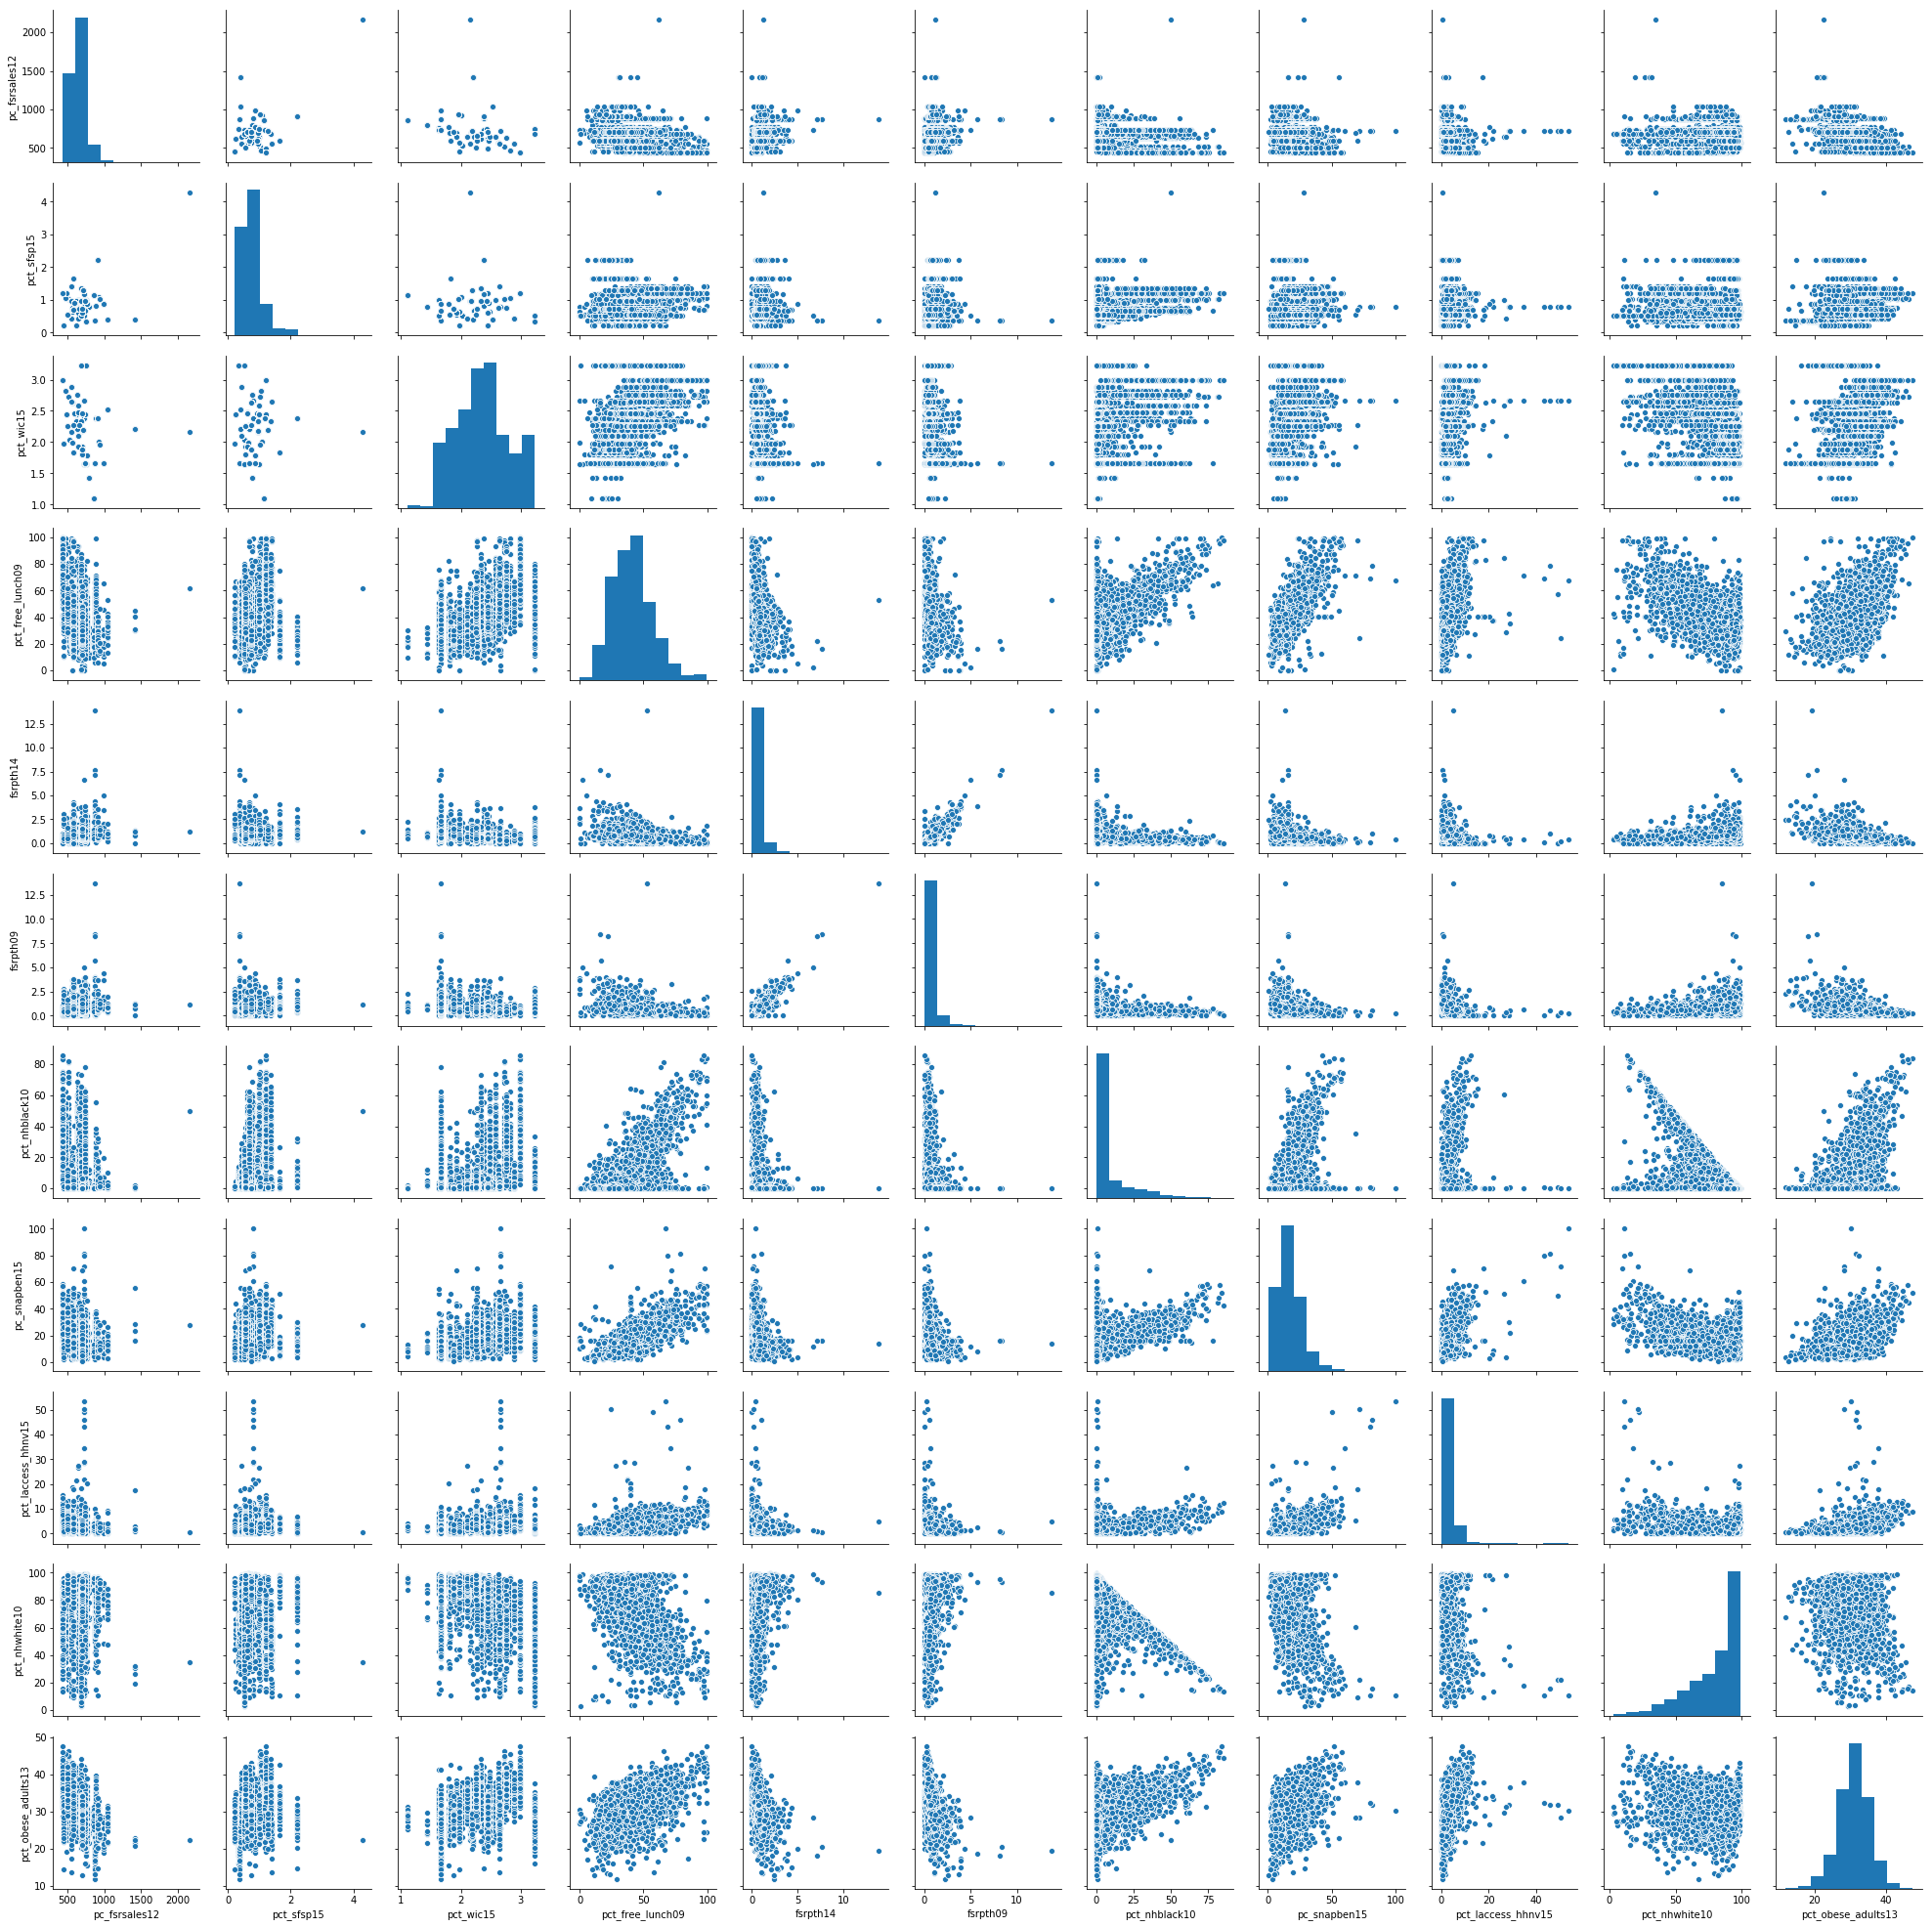

In [29]:
sns.pairplot(top_data)

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2)

In [49]:
newX = pd.DataFrame(pca.fit_transform(X), columns=['pca_col_1','pca_col_2']).join(y)

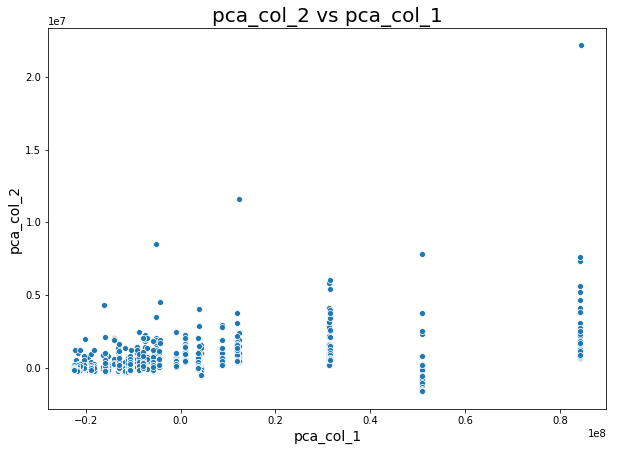

In [52]:
scatter(y='pca_col_2', x='pca_col_1', data=newX)